<div style="font-size:37px; font-weight:bold; line-height:1.1">
    Using pyanodi's kernel k-means
</div>

<p style="color:rgb(90,90,90);">
The MIT License (MIT)
</p>
<p style="color:rgb(90,90,90);">
Copyright (c) 2020 Guillaume Rongier
</p>
<p style="color:rgb(90,90,90);">
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
</p>
<ul style="color:rgb(90,90,90);">
<li>The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.</li>
<li>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.</li>
</ul>

This notebook shows how to use the functionalities of pyanodi for clustering.

Pyanodi implements the kernel k-means method, but can also run the normal k-means. For more details, see [Kernel Methods for Pattern Analysis](https://doi.org/10.1017/CBO9780511809682) by John Shawe-Taylor and Nello Cristianini. 

# Package imports

In [1]:
from itertools import cycle, islice
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans, SpectralClustering

from pyanodi import GaussianKernel, KernelKMeans

# Blobs

Let's use [scikit-learn's datasets module](https://scikit-learn.org/stable/modules/classes.html?highlight=datasets#module-sklearn.datasets) to generate some samples and test different clustering methods.

In [2]:
data = datasets.make_blobs(n_samples=1500,
                           cluster_std=2,
                           random_state=42)

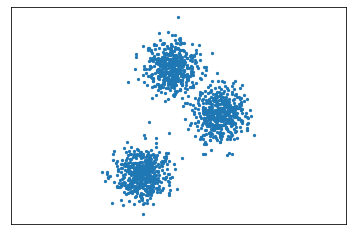

In [3]:
plt.figure()
plt.scatter(data[0][:, 0], data[0][:, 1], s=5)
plt.axis('equal')
plt.xticks(())
plt.yticks(())
plt.show()

We look at 3.5 methods:

- The k-means implementation by scikit-learn (labeled *K-means*).
- The spectral clustering implementation by scikit-learn (labeled *Spectral clustering*).
- The kernel k-means implementation by pyanodi (labeled *Kernel k-means*).
- The k-means implementation by pyanodi (labeled *K-means 2*).

In [4]:
methods = [('K-means', KMeans(n_clusters=3,
                              random_state=42)),
           ('Spectral clustering', SpectralClustering(n_clusters=3,
                                                      random_state=42)),
           ('Kernel k-means', KernelKMeans(n_clusters=3,
                                           random_state=42)),
           ('K-means 2', KernelKMeans(n_clusters=3,
                                      init='k-means++',
                                      kernel=None,
                                      random_state=42))]

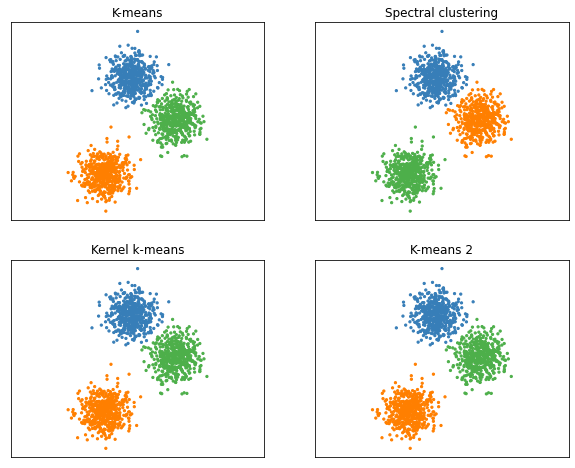

In [5]:
fig, axs = plt.subplots(nrows=2,
                        ncols=2,
                        figsize=(10, 8),
                        constrained_layout=False)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              3)))
for (j, i), ax in np.ndenumerate(axs):
    label = methods[j*2 + i][0]
    ax.set_title(label)
    method = methods[j*2 + i][1]
    method.fit(data[0])
    ax.scatter(data[0][:, 0], data[0][:, 1], c=colors[method.labels_], s=5)
    ax.axis('equal')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

# Circles

Let's use scikit-learn's datasets again to generate some circles.

In [6]:
data = datasets.make_circles(n_samples=1500,
                             noise=0.05,
                             random_state=42,
                             factor=0.5)

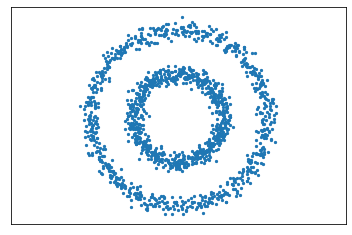

In [7]:
plt.figure()
plt.scatter(data[0][:, 0], data[0][:, 1], s=5)
plt.axis('equal')
plt.xticks(())
plt.yticks(())
plt.show()

We look at the same methods again:

- The k-means implementation by scikit-learn (labeled *K-means*).
- The spectral clustering implementation by scikit-learn (labeled *Spectral clustering*).
- The kernel k-means implementation by pyanodi (labeled *Kernel k-means*).
- The k-means implementation by pyanodi (labeled *K-means 2*).

But with slightly different parameters this time. The normal k-means cannot cluster those samples correctly, because it linearly separates the clusters. But even for spectral clustering and kernel k-means, these samples are more challenging to cluster, and not all parameters return the correct clusters. Other kernels might be more appropriate though.

In [8]:
methods = [('K-means', KMeans(n_clusters=2,
                              random_state=42)),
           ('Spectral clustering', SpectralClustering(n_clusters=2,
                                                      gamma=50.,
                                                      random_state=42)),
           ('Kernel k-means', KernelKMeans(n_clusters=2,
                                           init='k-means++',
                                           kernel=GaussianKernel(gamma=50.),
                                           random_state=42)),
           ('K-means 2', KernelKMeans(n_clusters=2,
                                      init='k-means++',
                                      kernel=None,
                                      random_state=42))]

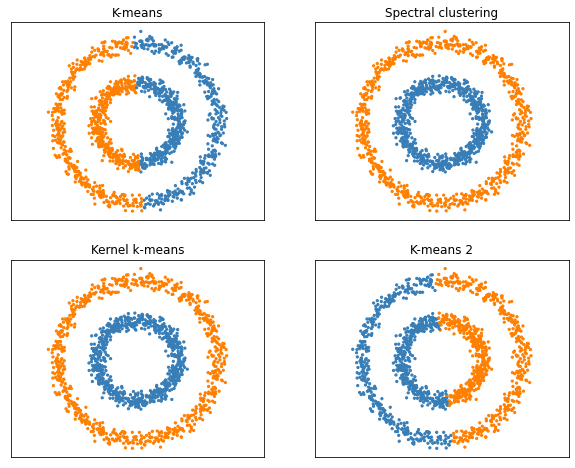

In [9]:
fig, axs = plt.subplots(nrows=2,
                        ncols=2,
                        figsize=(10, 8),
                        constrained_layout=False)
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              2)))
for (j, i), ax in np.ndenumerate(axs):
    label = methods[j*2 + i][0]
    ax.set_title(label)
    method = methods[j*2 + i][1]
    method.fit(data[0])
    ax.scatter(data[0][:, 0], data[0][:, 1], c=colors[method.labels_], s=5)
    ax.axis('equal')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()